In [1]:
import numpy as np 
import pandas as pd 
import datetime, json, math

import plotly
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pylab as plt
%matplotlib inline

# Preprocessing

In [3]:
rki_covid_data = pd.read_csv("../../Week 5/RKI_COVID19.csv", header=0, sep=",")
rki_covid_data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,8389847,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,8389848,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,8389849,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,8389850,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,8389851,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [4]:
print(rki_covid_data["AnzahlTodesfall"].unique())
print(rki_covid_data["AnzahlFall"].unique())
print(rki_covid_data["AnzahlGenesen"].unique())
print(rki_covid_data["NeuerFall"].unique())
print(rki_covid_data["NeuerTodesfall"].unique())
print(rki_covid_data["NeuGenesen"].unique())
print(rki_covid_data["Bundesland"].unique())

[ 0  1  3  2  6  4  5  7  8 -1]
[ 1  2  3  4  7 11  6 13  9  5 19  8 10 15 12 -1 18 14 16 17 29 22 23 32
 20 34 62 38 26 27 21 31 24 33 25 28]
[ 1  0  2  3  4 -1  7 11  6 13  9  5 19  8 10 15 12 18 14 16 17 29 22 23
 20 34 62 38 26 27 21 31 24 32 33 25 28]
[ 0  1 -1]
[-9  0  1 -1]
[ 0 -9  1 -1]
['Schleswig-Holstein' 'Hamburg' 'Niedersachsen' 'Bremen'
 'Nordrhein-Westfalen' 'Hessen' 'Rheinland-Pfalz' 'Baden-Württemberg'
 'Bayern' 'Saarland' 'Berlin' 'Brandenburg' 'Mecklenburg-Vorpommern'
 'Sachsen' 'Sachsen-Anhalt' 'Thüringen']


In [5]:
 # create a column containing the date
rki_covid_data["Date"] = pd.to_datetime(rki_covid_data['Refdatum'], format='%Y/%m/%d %H:%M:%S.%f')
rki_covid_data["Date"] = rki_covid_data['Date'].dt.date
rki_covid_data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2,Date
0,8389847,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt,2020-03-16
1,8389848,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt,2020-03-13
2,8389849,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt,2020-03-16
3,8389850,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt,2020-03-13
4,8389851,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"22.05.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt,2020-03-22


In [6]:
sorted(rki_covid_data["Date"])[-1]

datetime.date(2020, 5, 21)

In [7]:
iterables = [rki_covid_data["Bundesland"].unique(), pd.date_range(start=sorted(rki_covid_data["Date"])[0], end=sorted(rki_covid_data["Date"])[-1], freq='D')]
bund_date_index = pd.MultiIndex.from_product(iterables, names=['Bundesland', 'Date'])

In [8]:
cases_per_bund_per_day = rki_covid_data[rki_covid_data['NeuerFall'].isin([0,1])].groupby(["Bundesland", "Date"], as_index=True).AnzahlFall.sum()
deaths_per_bund_per_day = rki_covid_data[rki_covid_data['NeuerTodesfall'].isin([0,1])].groupby(["Bundesland", "Date"], as_index=True).AnzahlTodesfall.sum()
recovered_per_bund_per_day = rki_covid_data[rki_covid_data['NeuGenesen'].isin([0,1])].groupby(["Bundesland", "Date"], as_index=True).AnzahlGenesen.sum()
df_per_day = pd.DataFrame(index=bund_date_index)
df_per_day["AnzahlFall"] = cases_per_bund_per_day
df_per_day["AnzahlTodesfall"] = deaths_per_bund_per_day
df_per_day["AnzahlGenesen"] = recovered_per_bund_per_day
df_per_day.fillna(0,inplace=True)

# Data Exploration

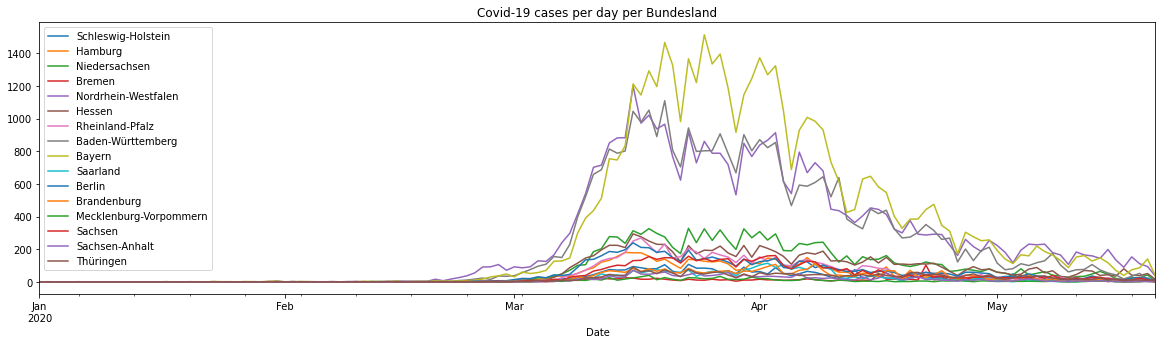

In [9]:
plt.figure(figsize=(20,5))
for bund in rki_covid_data["Bundesland"].unique():
    df_per_day["AnzahlFall"][bund].plot(label=bund)
plt.title("Covid-19 cases per day per Bundesland")
plt.legend()
plt.show()

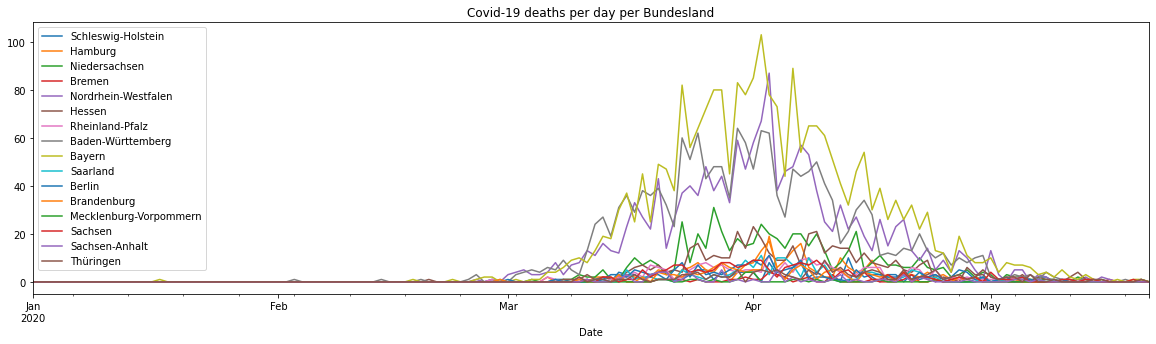

In [10]:
plt.figure(figsize=(20,5))
for bund in rki_covid_data["Bundesland"].unique():
    df_per_day["AnzahlTodesfall"][bund].plot(label=bund)
plt.title("Covid-19 deaths per day per Bundesland")
plt.legend()
plt.show()

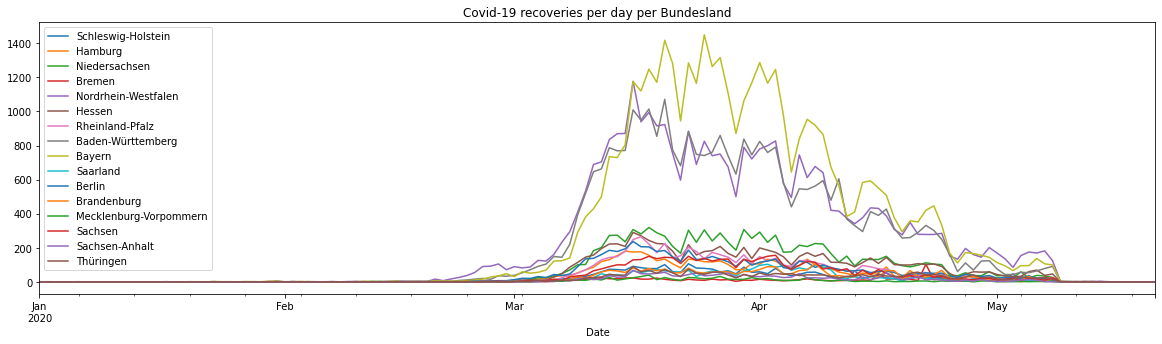

In [11]:
plt.figure(figsize=(20,5))
for bund in rki_covid_data["Bundesland"].unique():
    df_per_day["AnzahlGenesen"][bund].plot(label=bund)
plt.title("Covid-19 recoveries per day per Bundesland")
plt.legend()
plt.show()

In [12]:
# summed cases/deaths/recoveries per Bundesland
df_per_day.groupby("Bundesland", as_index=True).sum().sort_values("AnzahlFall",ascending=False)

,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
Bundesland,,,
Bayern,46024.0,2358.0,41230.0
Nordrhein-Westfalen,37010.0,1547.0,33102.0
Baden-Württemberg,34174.0,1680.0,30991.0
Niedersachsen,11420.0,568.0,10161.0
Hessen,9656.0,457.0,8385.0
Berlin,6585.0,190.0,6000.0
Rheinland-Pfalz,6566.0,224.0,6042.0
Sachsen,5197.0,203.0,4642.0
Hamburg,5059.0,240.0,4615.0


In [13]:
df_per_day

AnzahlFall  AnzahlTodesfall  AnzahlGenesen
Bundesland         Date                                                  
Schleswig-Holstein 2020-01-01         0.0              0.0            0.0
                   2020-01-02         0.0              0.0            0.0
                   2020-01-03         0.0              0.0            0.0
                   2020-01-04         0.0              0.0            0.0
                   2020-01-05         0.0              0.0            0.0
...                                   ...              ...            ...
Thüringen          2020-05-17         6.0              0.0            0.0
                   2020-05-18        12.0              0.0            0.0
                   2020-05-19        11.0              0.0            0.0
                   2020-05-20         9.0              1.0            0.0
                   2020-05-21         9.0              0.0            0.0

[2272 rows x 3 columns]

# Time-series Map

In [14]:
# Data source: https://github.com/isellsoap/deutschlandGeoJSON/tree/master/2_bundeslaender
map_file = open("3_mittel.geo.json")
germany_map = json.load(map_file)

germany_map['features'][0]['properties']

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 122: invalid start byte

In [18]:
map_file

<_io.TextIOWrapper name='3_mittel.geo.json' mode='r' encoding='UTF-8'>

In [15]:
df_per_day["AnzahlFallCumul"] = df_per_day["AnzahlFall"].groupby("Bundesland", as_index=True).cumsum()
df_per_day["AnzahlTodesfallCumul"] = df_per_day["AnzahlFall"].groupby("Bundesland", as_index=True).cumsum()
df_per_day["AnzahlGenesenCumul"] = df_per_day["AnzahlFall"].groupby("Bundesland", as_index=True).cumsum()

In [16]:
map_cases_per_day = df_per_day[["AnzahlFall","AnzahlFallCumul"]].reset_index()
map_cases_per_day['Date'] = map_cases_per_day["Date"].astype(str)
print(map_cases_per_day[90:100])

            Bundesland        Date  AnzahlFall  AnzahlFallCumul
90  Schleswig-Holstein  2020-03-31        60.0           1718.0
91  Schleswig-Holstein  2020-04-01        63.0           1781.0
92  Schleswig-Holstein  2020-04-02        48.0           1829.0
93  Schleswig-Holstein  2020-04-03        87.0           1916.0
94  Schleswig-Holstein  2020-04-04        52.0           1968.0
95  Schleswig-Holstein  2020-04-05        38.0           2006.0
96  Schleswig-Holstein  2020-04-06        50.0           2056.0
97  Schleswig-Holstein  2020-04-07        64.0           2120.0
98  Schleswig-Holstein  2020-04-08        58.0           2178.0
99  Schleswig-Holstein  2020-04-09        45.0           2223.0


In [17]:
fig = px.choropleth(map_cases_per_day, 
                    geojson=germany_map, 
                    locations='Bundesland',
                    color='AnzahlFallCumul',
                    featureidkey="properties.name", 
                    color_continuous_scale='blues',
                    animation_frame="Date",
                    scope="europe",
                    #center={"lat": 10, "lon": 10},
                    title="Infection number in 16 Bundesländer",
                    )

fig.show()

NameError: name 'germany_map' is not defined

# Bubble Map

In [47]:
# map the states to lat/long of their capital, from: https://latitudelongitude.org/de
'''
Baden-Württemberg – Hauptstadt Stuttgart, 48.78232, 9.17702
Bayern – Hauptstadt München, 48.13743, 11.57549
Berlin – Hauptstadt Berlin, 52.52437, 13.41053
Brandenburg – Hauptstadt Potsdam, 52.39886, 13.06566
Bremen – Hauptstadt Bremen, 53.07516, 8.80777
Hamburg – Hauptstadt Hamburg, 53.57532, 10.01534
Hessen – Hauptstadt Wiesbaden, 50.08258, 8.24932
Mecklenburg-Vorpommern – Hauptstadt Schwerin, 53.62937, 11.41316
Niedersachsen – Hauptstadt Hannover, 52.37052, 9.73322
Nordrhein-Westfalen – Hauptstadt Düsseldorf, 51.22172, 6.77616
Rheinland-Pfalz – Hauptstadt Mainz, 49.98419, 8.2791
Saarland – Hauptstadt Saarbrücken, 49.2354, 6.98165
Sachsen – Hauptstadt Dresden, 51.05089, 13.73832
Sachsen-Anhalt – Hauptstadt Magdeburg, 52.12773, 11.62916
Schleswig-Holstein – Hauptstadt Kiel, 54.32133, 10.13489
Thüringen – Hauptstadt Erfurt, 50.9787, 11.03283
'''
capital_dict = {'Schleswig-Holstein': (54.32133, 10.13489), 'Hamburg':(53.57532, 10.01534), 'Niedersachsen':(52.37052, 9.73322),
                'Bremen':(53.07516, 8.80777), 'Nordrhein-Westfalen':(51.22172, 6.77616), 'Hessen':(50.08258, 8.24932), 
                'Rheinland-Pfalz':(49.98419, 8.2791), 'Baden-Württemberg':(48.78232, 9.17702), 'Bayern':(48.13743, 11.57549), 
                'Saarland':(49.2354, 6.98165), 'Berlin':(52.52437, 13.41053), 'Brandenburg':(52.39886, 13.06566),
                'Mecklenburg-Vorpommern':(53.62937, 11.41316), 'Sachsen':(51.05089, 13.73832), 'Sachsen-Anhalt':(52.12773, 11.62916), 
                'Thüringen':(50.9787, 11.03283)}
lat = [capital_dict[bund][0] for bund in map_cases_per_day["Bundesland"].unique() for i in range(len(iterables[1]))]
long = [capital_dict[bund][1] for bund in map_cases_per_day["Bundesland"].unique() for i in range(len(iterables[1]))]

map_cases_per_day["lat"] = lat
map_cases_per_day["long"] = long
map_cases_per_day.head()

,Bundesland,Date,AnzahlFall,AnzahlFallCumul,lat,long
0,Schleswig-Holstein,2020-01-01,0.0,0.0,54.32133,10.13489
1,Schleswig-Holstein,2020-01-02,0.0,0.0,54.32133,10.13489
2,Schleswig-Holstein,2020-01-03,0.0,0.0,54.32133,10.13489
3,Schleswig-Holstein,2020-01-04,0.0,0.0,54.32133,10.13489
4,Schleswig-Holstein,2020-01-05,0.0,0.0,54.32133,10.13489


In [ ]:
# df = px.data.gapminder()
fig = px.scatter_geo(map_cases_per_day, locations="Bundesland", color="AnzahlFallCumul",
                     hover_name="Bundesland", size="AnzahlFallCumul",
                     #geojson=germany_map,
                     #featureidkey="properties.name",
                     lat="lat",
                     lon="long",
                     color_continuous_scale='blues',
                     animation_frame="Date",
                     #scope="europe",
                     #center={"lat": 10, "lon": 10},
                     title="Infection number in 16 Bundesländer",)
fig.show()

# Changepoint Analysis

In [ ]:
import sys
!{sys.executable} -m pip install ruptures

In [59]:
import ruptures as rpt

In [97]:
def plot_changepoint_analysis(example):
    # taken from here: https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/
    #Convert the time series values to a numpy 1D array
    points=np.array(example)
    x_loc = np.arange(len(example.index),step=15)
    x_desc = example.index.astype(str)[::15]

    #RUPTURES PACKAGE
    #Changepoint detection with the Pelt search method
    model="rbf"
    algo = rpt.Pelt(model=model).fit(points)
    result = algo.predict(pen=10)
    rpt.display(points, result, figsize=(10, 6))
    plt.title('Change Point Detection: Pelt Search Method')
    plt.xticks(x_loc, x_desc)
    plt.show() 

    #Changepoint detection with the Binary Segmentation search method
    model = "l2"  
    algo = rpt.Binseg(model=model).fit(points)
    my_bkps = algo.predict(n_bkps=10)
    # show results
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.title('Change Point Detection: Binary Segmentation Search Method')
    plt.xticks(x_loc, x_desc)
    plt.show()

    #Changepoint detection with window-based search method
    model = "l2"  
    algo = rpt.Window(width=40, model=model).fit(points)
    my_bkps = algo.predict(n_bkps=10)
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.title('Change Point Detection: Window-Based Search Method')
    plt.xticks(x_loc, x_desc)
    plt.show()

    #Changepoint detection with dynamic programming search method
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.title('Change Point Detection: Dynamic Programming Search Method')
    plt.xticks(x_loc, x_desc)
    plt.show()

In [70]:
example = df_per_day["AnzahlFall"]["Berlin"]

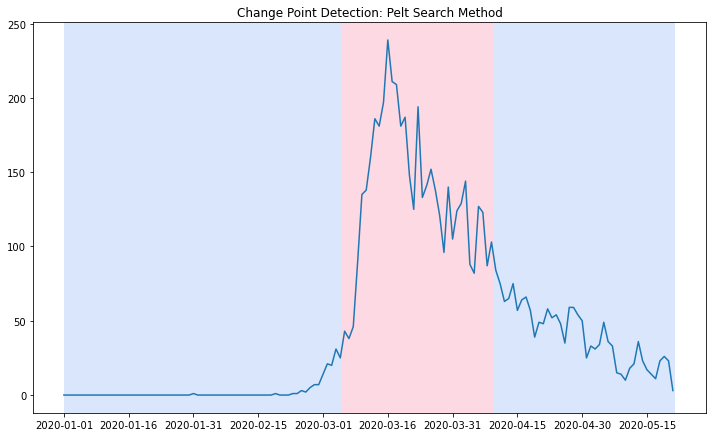

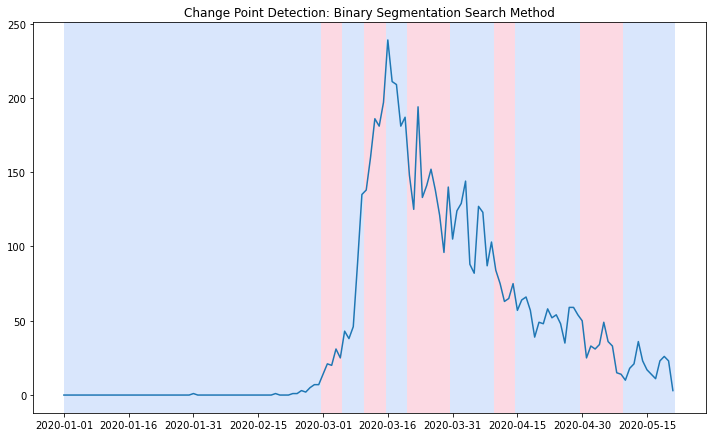

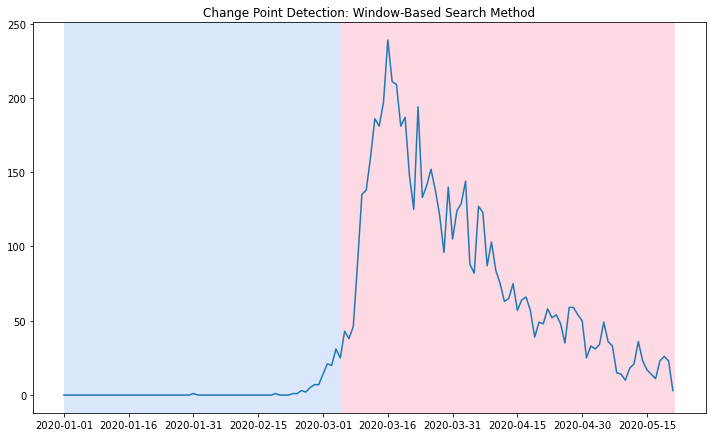

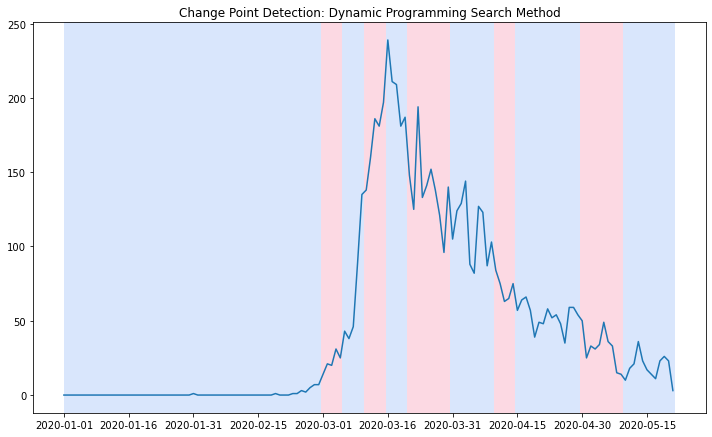

In [98]:
plot_changepoint_analysis(example)